In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)


In [2]:
#We chose 5 stocks
df1 = pdr.get_data_yahoo('AAPL',start='2011-01-01',end='2021-10-31')
df1 = df1[['Open','Close']]
df1 = df1.rename(columns ={'Open': 'Open_AAPL', 'Close':'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT','2010-11-01','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open': 'Open_MSFT', 'Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('INTC','2010-11-01','2021-10-31')
df3 = df3[['Open','Close']]
df3 = df3.rename(columns ={'Open':'Open_INTC','Close':'Close_INTC'})
df4 = pdr.get_data_yahoo('AMD','2010-11-01','2021-10-31')
df4 = df4[['Open','Close']]
df4 = df4.rename(columns ={'Open': 'Open_AMD', 'Close':'Close_AMD'})
df5 =  pdr.get_data_yahoo('CSCO','2010-11-01','2021-10-31')
df5 = df5[['Open','Close']]
df5 = df5.rename(columns ={'Open': 'Open_CSCO', 'Close':'Close_CSCO'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_INTC,Close_INTC,Open_AMD,Close_AMD,Open_CSCO,Close_CSCO
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,21.030001,21.030001,8.140000,8.180000,20.240000,20.230000
2011-01-03,11.630000,11.770357,28.049999,27.980000,21.010000,20.850000,8.440000,8.470000,20.450001,20.490000
2011-01-04,11.872857,11.831786,27.940001,28.090000,21.120001,21.150000,8.560000,8.770000,20.510000,20.520000
2011-01-05,11.769643,11.928571,27.900000,28.000000,21.190001,20.940001,8.740000,8.910000,20.580000,20.770000
2011-01-06,11.954286,11.918929,28.040001,28.820000,20.670000,20.770000,8.920000,8.690000,20.910000,20.950001
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,49.830002,49.410000,120.519997,122.360001,55.110001,55.139999
2021-10-26,149.330002,149.320007,311.000000,310.109985,49.400002,48.279999,122.989998,122.930000,55.560001,55.810001
2021-10-27,149.360001,148.850006,316.000000,323.170013,48.520000,47.889999,121.629997,122.279999,56.130001,56.180000


In [3]:
#Slice off the first three years.
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_INTC','Close_AMD','Close_CSCO']]
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT']= three_years['Close_MSFT'].pct_change()
three_years['Return_INTC']= three_years['Close_INTC'].pct_change()
three_years['Return_AMD']= three_years['Close_AMD'].pct_change()
three_years['Return_CSCO']= three_years['Close_CSCO'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_INTC','Return_AMD','Return_CSCO']]
three_years= three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_INTC,Return_AMD,Return_CSCO
Date,,,,,
2011-01-04,0.005219,0.003931,0.014388,0.035419,0.001464
2011-01-05,0.008180,-0.003204,-0.009929,0.015963,0.012183
2011-01-06,-0.000808,0.029286,-0.008118,-0.024691,0.008666
2011-01-07,0.007161,-0.007634,-0.005296,0.016111,0.000955
2011-01-10,0.018833,-0.013287,0.001452,0.040770,-0.008584
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,0.004344,0.005333,0.005563
2013-12-26,-0.006641,0.009709,0.010617,0.007958,0.005071
2013-12-27,-0.006757,-0.004006,-0.003891,-0.005263,0.010092


In [4]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T
no_of_asset_classes = 5
no_of_portfolios = 10000
np.random.seed(123)

# 
collection_of_random_asset_weights = [] 
portfolio_means = [] 
portfolio_standard_deviations = [] 
portfolio_sharpe_ratios = [] 

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[2])
    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

#print(collection_of_random_asset_weights[index])

x=collection_of_random_asset_weights[index]
some_weights = pd.DataFrame({"AAPL": x[0,0], "MSFT": x[0,1], "INTC": x[0,2],"AMD" : x[0,3] ,"CSCO":x[0,4]}, index = [three_years.last_valid_index()])  
some_weights

,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,0.408896,0.395262,0.185759,0.000265,0.009819


In [5]:
capital = 10000
allocations = capital*some_weights
allocations

,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,4088.959276,3952.615046,1857.585329,2.654906,98.185443


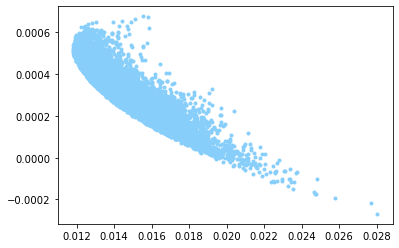

In [6]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

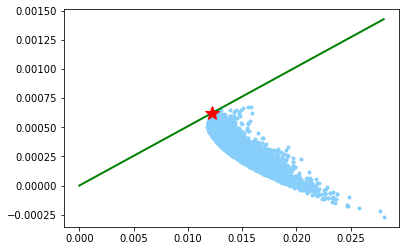

In [7]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [8]:
print("The maximum value of Sharpe ratio achieved is : ",portfolio_sharpe_ratios[index])
print("with index value as: ",index)

The maximum value of Sharpe ratio achieved is :  0.050994764251730634
with index value as:  1566


In [9]:
print(df['Close_AAPL'].loc[some_weights.last_valid_index()])
print(df['Close_MSFT'].loc[some_weights.last_valid_index()])
print(df['Close_INTC'].loc[some_weights.last_valid_index()])
print(df['Close_AMD'].loc[some_weights.last_valid_index()])
print(df['Close_CSCO'].loc[some_weights.last_valid_index()])

no_of_shares = allocations /df[[f'Open_{sym}' for sym in some_weights.columns]].loc[some_weights.index[0]].values
no_of_shares

20.036428451538086
37.40999984741211
25.959999084472656
3.869999885559082
22.43000030517578


,AAPL,MSFT,INTC,AMD,CSCO
2013-12-31,206.5988,105.68489,71.971537,0.686022,4.412829


In [10]:
seven_years = df.loc['2014-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] + seven_years['Open_INTC']*no_of_shares['INTC'].iloc[0]+ seven_years['Open_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Open_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_INTC']*no_of_shares['INTC'].iloc[0]+ seven_years['Close_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Close_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2014-12-31,13528.697372,13346.600679
2015-01-02,13448.486220,13329.242084
2015-01-05,13221.514147,13092.774542
2015-01-06,13122.739708,12973.139609
2015-01-07,13082.872816,13165.722542
...,...,...
2021-10-25,67323.996300,67156.909859
2021-10-26,67604.344648,67428.672423
2021-10-27,68077.214101,68684.936336


Abslute Return of Our Portofolio:598.52%
CAGR of Our Portofolio: 175.97%
Information Ratio of Our Portofolio:1.09



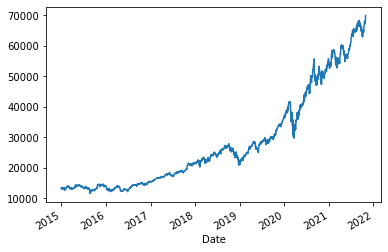

In [11]:
# Calculate the Absolute Return .
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
# Calculate the CAGR .
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
# Calculate the IR .
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [12]:
short_time = 5
long_time = 15
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2015-01-22,13351.074434,13570.284848,13246.404882,13279.784323,33.379441,163.177086
2015-01-23,13592.415022,13571.125646,13350.409227,13294.752654,-55.656573,241.340588
2015-01-26,13572.680338,13512.345663,13431.204289,13306.959559,-124.244730,-19.734684
2015-01-27,12944.657251,12726.829718,13328.383233,13282.563238,-45.819995,-628.023086
2015-01-28,13196.111907,12860.197859,13248.156747,13275.033788,26.877041,251.454656
...,...,...,...,...,...,...
2021-10-25,67323.996300,67156.909859,67552.885770,65914.619112,-1638.266659,-361.038188
2021-10-26,67604.344648,67428.672423,67516.977116,66152.212430,-1364.764687,280.348349
2021-10-27,68077.214101,68684.936336,67726.276543,66430.643052,-1295.633492,472.869453


In [13]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.0021960256606607326]
1,Close,[-0.0013599425775990192]
2,Close_Short_Rolling,[-0.0006247686071794733]
3,Close_Long_Rolling,[-0.00020552047242524644]
4,Window_diff,[0.000419248134754592]
5,Open_1_change,[-0.00034326260040010685]


In [14]:
#
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[206 314]
 [239 436]]
0.5372384937238494


In [15]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2017-02-02,16048.034143,16100.582537,16052.826196,15797.476453,-255.349743,-108.512148,71.381930,1,1,71.381930,71.381930
2017-02-03,16125.274239,16171.964467,16061.590905,15838.395698,-223.195207,77.240096,41.140632,1,1,41.140632,112.522562
2017-02-06,16154.822473,16213.105098,16103.829835,15881.762185,-222.067650,29.548234,48.038445,-1,1,-48.038445,64.484116
2017-02-07,16250.182308,16261.143543,16177.481057,15926.233753,-251.247304,95.359835,18.379656,1,1,18.379656,82.863772
2017-02-08,16265.912440,16279.523199,16205.263769,15972.353850,-232.909919,15.730132,30.424933,1,1,30.424933,113.288705
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,67685.034488,67277.819382,67520.838359,65625.696181,-1895.142178,197.225424,-120.909523,1,-1,-120.909523,45413.162050
2021-10-25,67323.996300,67156.909859,67552.885770,65914.619112,-1638.266659,-361.038188,271.762564,1,1,271.762564,45684.924614
2021-10-26,67604.344648,67428.672423,67516.977116,66152.212430,-1364.764687,280.348349,1256.263913,1,1,1256.263913,46941.188527


Abslute Return of Our Algorithmic Trading:595.91%
Abslute Return of Our buy-and-hold Trading :333.64%
CAGR of Our Algorithmic Trading: 175.86%
CAGR of Our buy-and-hold Trading: 14.52%
Information Ratio of Our Algorithmic Trading:1.28
Information Ratio of Our buy-and-hold Trading:1.28



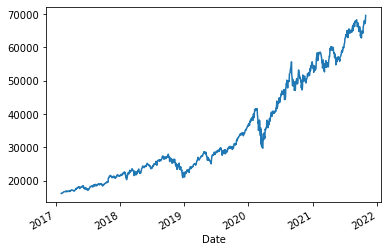

In [16]:
#Calculate the Abslute Return of Our Algorithmic Trading.
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
#Calculate the CAGR of Our Algorithmic Trading.
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
#Calculate the IR Of Our Algorithmic Trading.
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)


##Calculate the Abslute Return of Our buy-and-hold Trading. 
absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
#Calculate the CAGR of Our buy-and-hold Trading. 
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
#Calculate the IR Of Our buy-and-hold Trading .
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()
#or
axs=results.Close.plot()


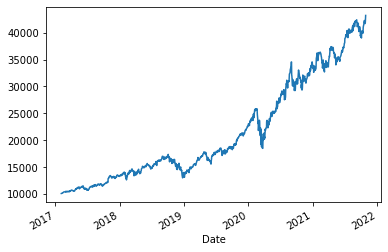

In [17]:
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()
#or
axs=((results.Close.pct_change().dropna()+1).cumprod()*capital).plot()